Bài viết này được lấy từ nguồn: [machinelearningcoban](https://machinelearningcoban.com/2017/01/01/kmeans/)

Bài viết đã có nhiều chỉnh sửa để đơn giản hóa nội dung hơn

# K-means Clustering

Bài này tôi sẽ giới thiệu một trong những thuật toán cơ bản nhất trong Unsupervised learning - thuật toán K-means clustering (phân cụm K-means).

Trong thuật toán này, chúng ta không biết nhãn (label) của từng điểm dữ liệu. Mục đích là làm thể nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho dữ liệu trong cùng một cụm có tính chất giống nhau.

**Ví dụ:**

Một công ty muốn tạo ra những chính sách ưu đãi cho những nhóm khách hàng khác nhau dựa trên các thông tin: 
- Số năm khách hàng gắn bó với công ty; 
- Số tiền khách hàng đã chi trả cho công ty; 
- độ tuổi; giới tính; 
- Thành phố; 
- Nghề nghiệp. 

Giả sử công ty đó có rất nhiều dữ liệu của rất nhiều khách hàng nhưng chưa biết nên phân loại toàn bộ khách hàng đó như thế nào. Nếu là một người biết Machine Learning, phương pháp đầu tiên anh (chị) ta nghĩ đến sẽ là K-means Clustering. 

Vì nó là một trong những thuật toán đầu tiên mà anh ấy tìm được trong các cuốn sách, khóa học về Machine Learning. Và tôi cũng chắc rằng anh ấy đã đọc blog Machine Learning cơ bản. Sau khi đã phân ra được từng nhóm, nhân viên công ty đó có thể lựa chọn ra một vài khách hàng trong mỗi nhóm để quyết định xem mỗi nhóm tương ứng với nhóm khách hàng nào. Phần việc cuối cùng này cần sự can thiệp của con người, nhưng lượng công việc đã được rút gọn đi rất nhiều.

## Ý tưởng

Ý tưởng đơn giản nhất về cluster (cụm) là tập hợp các điểm ở gần nhau trong một không gian nào đó (không gian này có thể có rất nhiều chiều trong trường hợp thông tin về một điểm dữ liệu là rất lớn). Hình bên dưới là một ví dụ về 3 cụm dữ liệu (từ giờ tôi sẽ viết gọn là cluster).

![](https://machinelearningcoban.com/assets/kmeans/figure_2.png)

Giả sử mỗi cluster có một điểm đại diện gọi là center (màu vàng). Khi đó, bất kỳ điểm nào khác gần với center nhất thì nó thuộc về cùng cluster với center đó. 

Tới đây, chúng ta có một bài toán thú vị: *Trên một vùng biển hình vuông lớn có ba đảo hình vuông, tam giác, và tròn màu vàng như hình trên. Một điểm trên biển được gọi là thuộc lãnh hải của một đảo nếu nó nằm gần đảo này hơn so với hai đảo kia . Hãy xác định ranh giới lãnh hải của các đảo.*

![](https://machinelearningcoban.com/assets/kmeans/figure_1.png)

**Nhắc nhở**: Chúng ta nên nhìn bài toán dưới góc độ của người hiểu biết về machine learning. Cụ thể, ta nên nắm rõ các khái niệm cơ bản như không gian, số chiều.

- **Không gian:** tập hợp các điểm dữ liệu (Ví dụ: danh sách khách hàng của công ty)
- **Số chiều:** Số thuộc tính của mỗi điểm dữ liệu (ví dụ: mỗi khách hàng sẽ có các thuộc tính như Số năm; Số tiền chi trả; độ tuổi; giới tính; Thành phố; Nghề nghiệp.)

Chúng ta có thể hình dung không gian dữ liệu là một bảng, mỗi hàng là một điểm dữ liệu, các cột trong bảng chính là số số chiều của không gian đó


(30, 2)
[[-0.55552381  4.69595848]
 [-1.54381335  3.17488138]
 [-1.93038028  2.70215036]
 [-1.8333871   2.20950295]
 [ 2.14823598  1.12456117]
 [ 1.87271752  4.18069237]
 [ 1.52259607 -0.29081422]
 [-2.06418395  3.15002376]
 [ 1.74947621  0.63481908]
 [-1.90749727  2.70023756]
 [-2.49524272  2.79023809]
 [-1.42044833  2.6768137 ]
 [-1.48699368  3.0993654 ]
 [ 2.79344193  1.61909157]
 [ 1.1641107   3.79132988]
 [ 1.54632313  4.212973  ]
 [ 1.82287143  0.71628201]
 [ 1.06269622  5.17635143]
 [-2.01479178  1.8821127 ]
 [ 1.4949318   3.85848832]
 [ 2.97493505  1.77927892]
 [ 2.08272263  0.78535335]
 [ 1.24258802  4.50399192]
 [ 0.91433877  4.55014643]
 [ 2.33812285  3.43116792]
 [ 1.84652023  0.99147304]
 [ 1.03150541  2.0681289 ]
 [ 1.42613574  0.0456529 ]
 [-2.27858123  3.38437647]
 [ 1.43289271  4.37679234]]


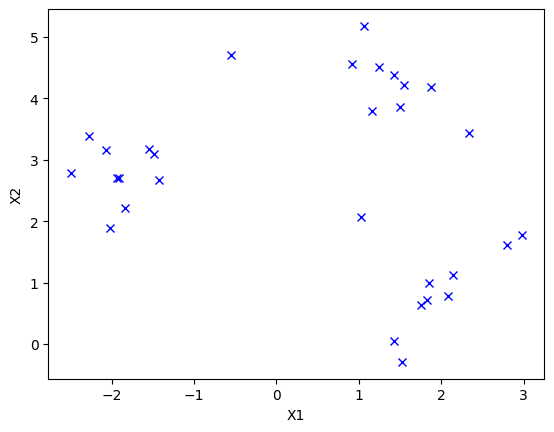

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=30, centers=3,
                       cluster_std=0.60, random_state=0)
print(x.shape)
print(x)
plt.plot(x.T[0], x.T[1], 'bx')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

[[ 1.93984407  0.94738267]
 [-1.89753197  2.77697024]
 [ 1.25131979  4.27778921]]
[2 1 1 1 0 2 0 1 0 1 1 1 1 0 2 2 0 2 1 2 0 0 2 2 2 0 0 0 1 2]


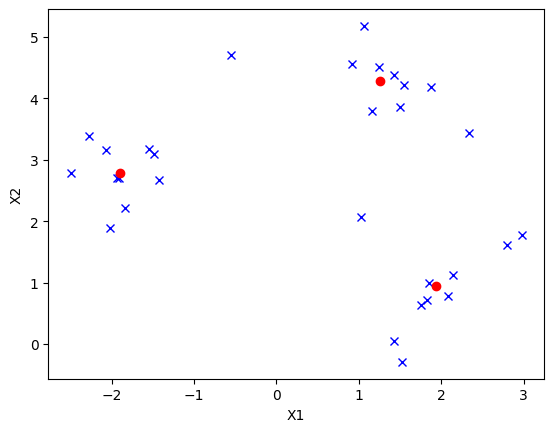

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)
center = kmeans.cluster_centers_
print(center)
predicted_labels = kmeans.predict(x)
print(predicted_labels)
plt.plot(x.T[0], x.T[1], 'bx')
plt.plot(center.T[0],center.T[1],'ro')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
print(X.shape)
print(y_true.shape)
print(y_true[:10])

(300, 2)
(300,)
[1 3 0 3 1 1 2 0 3 3]


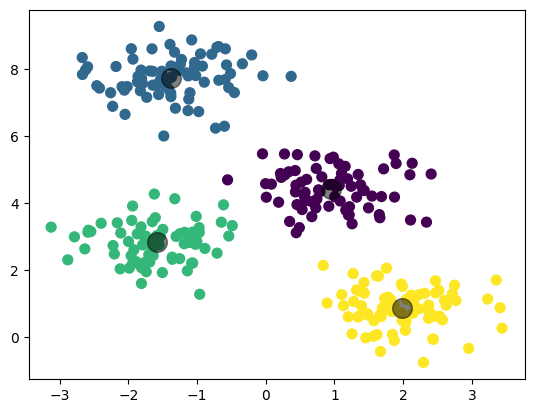

In [7]:
# second example
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Nhược điểm

chỉ nên áp dụng cho dữ liệu liên tục
không khả dụng với dữ liệu danh mục (category)
Nhạy cảm với dữ liệu ngoại lai